# Project 1: MNIST faishon-dataset classification


[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


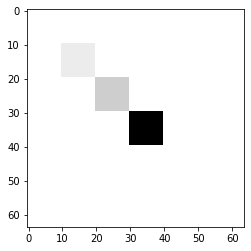

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x=np.ones((64,64),dtype=int)
x[10:20,10:20]=20
x[20:30,20:30]=50
x[30:40,30:40]=255
plt.imshow(x,cmap=plt.cm.binary)
print(x)

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
fas_data=keras.datasets.fashion_mnist
(train_image,train_label),(test_image,test_label)=fas_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
# explore the data
print(train_image.shape)
print(train_label[0:20])
print(np.unique(train_label))
print('Number of class',len(np.unique(train_label)))
print(test_image.shape)
print(np.unique(test_label))

(60000, 28, 28)
[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4]
[0 1 2 3 4 5 6 7 8 9]
Number of class 10
(10000, 28, 28)
[0 1 2 3 4 5 6 7 8 9]


(28, 28)
tf.Tensor(255, shape=(), dtype=uint8)
tf.Tensor(0, shape=(), dtype=uint8)


Text(0.5, 0, 'bag')

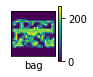

In [4]:
# exploring an image
i=10000 # image number 
print(train_image[i].shape)
print(tf.reduce_max(train_image[i]))
print(tf.reduce_min(train_image[i]))
class_name=['Tshirt/Top','Trouser','Pullover','Dress','coat',
            'Sandal','shirt','sneaker','bag','ankle boot']
#####################
import matplotlib.pyplot as plt
plt.figure(figsize=(1,1))
plt.imshow(train_image[i])#,cmap=plt.cm.binary)
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.xlabel(class_name[train_label[i]])


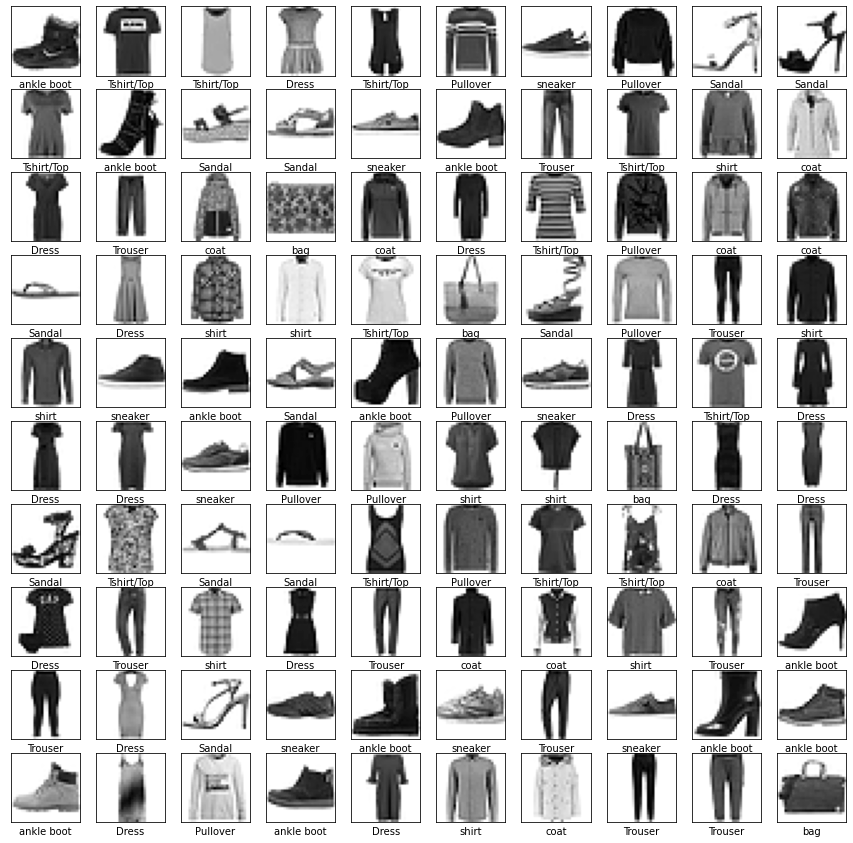

In [5]:
# visulize first 100 image
plt.figure(figsize=(15,15))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(train_image[i],cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(class_name[train_label[i]])
plt.show()

In [6]:
# data preprocessing
# input data = scaling pixel values [0-1]
train_image=train_image/255.0
test_image=test_image/255.0
# 
train_l=keras.utils.to_categorical(train_label,10) # onehot encoder
test_l=keras.utils.to_categorical(test_label,10)


In [7]:
x=np.array([0,0,1,1,2,2,0])
x1=keras.utils.to_categorical(x,3)
print(x1)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [8]:
model=keras.Sequential()


In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential()
model.add(layers.Flatten(input_shape=(28,28))) # 5 x5=25x1
model.add(layers.Dense(128))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_image,train_l,epochs=10,verbose=1,validation_split=0.2,batch_size=100)

Epoch 1/10
480/480 [==============================] - 2s 4ms/step - loss: 0.5789 - accuracy: 0.7992 - val_loss: 0.4668 - val_accuracy: 0.8386
Epoch 2/10
480/480 [==============================] - 2s 3ms/step - loss: 0.4598 - accuracy: 0.8408 - val_loss: 0.4447 - val_accuracy: 0.8443
Epoch 3/10
480/480 [==============================] - 1s 3ms/step - loss: 0.4392 - accuracy: 0.8478 - val_loss: 0.4686 - val_accuracy: 0.8336
Epoch 4/10
480/480 [==============================] - 1s 3ms/step - loss: 0.4278 - accuracy: 0.8504 - val_loss: 0.4494 - val_accuracy: 0.8433
Epoch 5/10
480/480 [==============================] - 1s 3ms/step - loss: 0.4199 - accuracy: 0.8549 - val_loss: 0.4314 - val_accuracy: 0.8506
Epoch 6/10
480/480 [==============================] - 1s 3ms/step - loss: 0.4146 - accuracy: 0.8554 - val_loss: 0.4283 - val_accuracy: 0.8490
Epoch 7/10
480/480 [==============================] - 1s 3ms/step - loss: 0.4069 - accuracy: 0.8584 - val_loss: 0.4340 - val_accuracy: 0.8487
Epoch 

In [11]:
test_loss,test_acc=model.evaluate(test_image,test_l)
print(test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.4552 - accuracy: 0.8435
0.843500018119812


In [12]:
pred=model.predict(test_image) # prediction of all 10000 image
i=1080
class_name=['Tshirt/Top','Trouser','Pullover','Dress','coat',
            'Sandal','shirt','sneaker','bag','ankle boot']
print(pred[i])
print('Predected class ',class_name[tf.argmax(pred[i]).numpy()])
print('Target Class',class_name[test_label[i]])
print('probability ',tf.reduce_max(pred[i]).numpy()*100)

[1.2400151e-03 2.2324682e-03 9.4995240e-04 9.9513584e-01 2.6610726e-04
 8.8883230e-13 6.2391409e-05 1.6990224e-08 1.1318557e-04 3.5364433e-08]
Predected class  Dress
Target Class Dress
probability  99.51358437538147


In [13]:
# prediction of single image
i=10
img=test_image[i]
# image = cv2.imread('C:/Users/N/Desktop/Test.jpg')
# img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

print(img.shape)
import numpy as np
img=np.expand_dims(img,0)
print(img.shape)
pred=model.predict(img) # 28x28
print(pred)

(28, 28)
(1, 28, 28)
[[2.7739690e-03 4.0849156e-04 3.6819613e-01 2.2550584e-03 5.4558969e-01
  7.2475276e-10 8.0733299e-02 5.0354872e-12 4.3296681e-05 1.8577455e-12]]


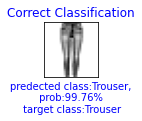

In [14]:
import matplotlib.pyplot as plt
def plot_image(i,prediction,true_label,img):
  true_label=true_label[i]
  image=img[i]
  pred_label=np.argmax(prediction[i])
  plt.figure(figsize=(1,1))
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(image,cmap=plt.cm.binary)
  if true_label==pred_label:
    color='blue'
    plt.title('Correct Classification',color=color)
  else:
    color='red'
    plt.title('Misclassification',color=color)
  plt.xlabel('predected class:{},\n prob:{:2.2f}% \n target class:{}'.format(
      class_name[pred_label],np.max(prediction[i])*100,class_name[true_label]
  ),color=color)
  plt.show()
i=8880
prediction=model.predict(test_image)
plot_image(i,prediction,test_label,test_image)


